In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

In [17]:
# Importar a biblioteca apyori e os dados
# Usar algoritmo Apriori

!pip -qq install apyori
import apyori

In [18]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/cesta_padaria.csv'
transacoes = pd.read_csv(url)
transacoes.head(10)

C:\Users\flavi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,5,8,9,10,12,16,18,20,27,31,33,34,36,38,39,41,42,44,46,52,53,54,56,59,63,64,66,67,68,69,70,71,76,80,81,82,84,89,90,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
transacoes.describe()

,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
count,1,43,344,7,38,1,152,48,5,6,...,1,58,146,318,192,21,13,16,52,7
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
freq,1,43,344,7,38,1,152,48,5,6,...,1,58,146,318,192,21,13,16,52,7


In [20]:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   adjustment                     1 non-null      object
 1   afternoon with the baker       43 non-null     object
 2   alfajores                      344 non-null    object
 3   argentina night                7 non-null      object
 4   art tray                       38 non-null     object
 5   bacon                          1 non-null      object
 6   baguette                       152 non-null    object
 7   bakewell                       48 non-null     object
 8   bare popcorn                   5 non-null      object
 9   basket                         6 non-null      object
 10  bowl nic pitt                  2 non-null      object
 11  bread                          3097 non-null   object
 12  bread pudding                  4 non-null      object
 13  bri

In [21]:
len(transacoes)

9465

In [22]:
# Análise Exploratória

itens = transacoes.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

Existem 94 produtos distintos:
 ['adjustment' 'afternoon with the baker' 'alfajores' 'argentina night'
 'art tray' 'bacon' 'baguette' 'bakewell' 'bare popcorn' 'basket'
 'bowl nic pitt' 'bread' 'bread pudding' 'brioche and salami' 'brownie'
 'cake' 'caramel bites' 'cherry me dried fruit' 'chicken sand'
 'chicken stew' 'chimichurri oil' 'chocolates' 'christmas common' 'coffee'
 'coffee granules' 'coke' 'cookies' 'crepes' 'crisps'
 'drinking chocolate spoons' 'duck egg' 'dulce de leche' 'eggs'
 "ella's kitchen pouches" 'empanadas' 'extra salami or feta' 'fairy doors'
 'farm house' 'focaccia' 'frittata' 'fudge' 'gift voucher'
 'gingerbread syrup' 'granola' 'hack the stack' 'half slice monster'
 'hearty & seasonal' 'honey' 'hot chocolate' 'jam' 'jammie dodgers'
 'juice' 'keeping it local' 'kids biscuit' 'lemon and coconut' 'medialuna'
 'mighty protein' 'mineral water' 'mortimer' 'muesli' 'muffin'
 'my-5 fruit shoot' 'nomad bag' 'olum & polenta' 'panatone' 'pastry'
 'pick and mix bowls' 'pi

AttributeError: 'Text' object has no property 'weigth'

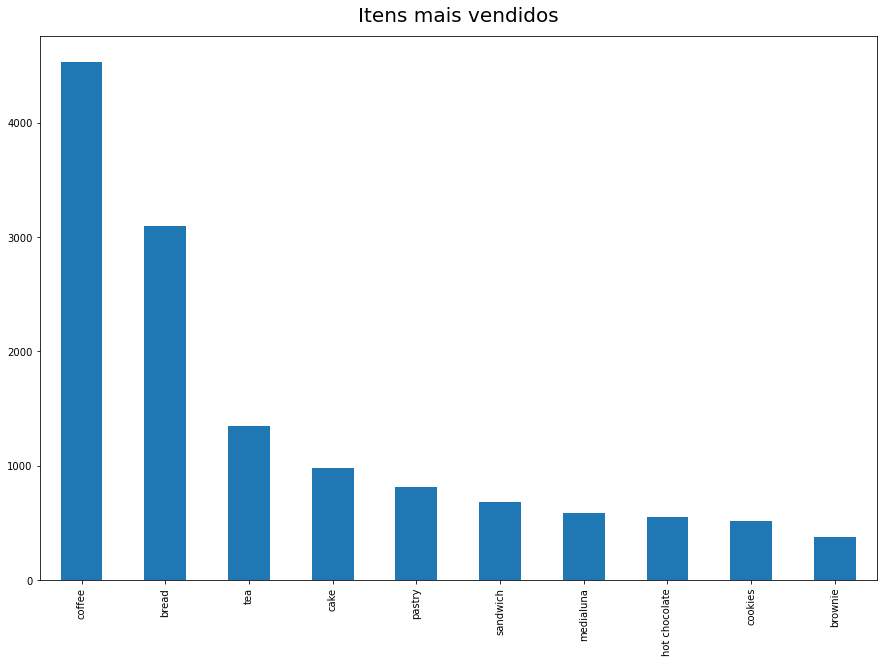

In [23]:
# Itens mais vendidos

qtde_itens = itens.value_counts()

ax = qtde_itens.nlargest(10).plot(kind="bar")
ax.set_title("Itens mais vendidos", size=20, weigth=500 , pad=15)
ax.set_ylabel("Qtde")
plt.show()


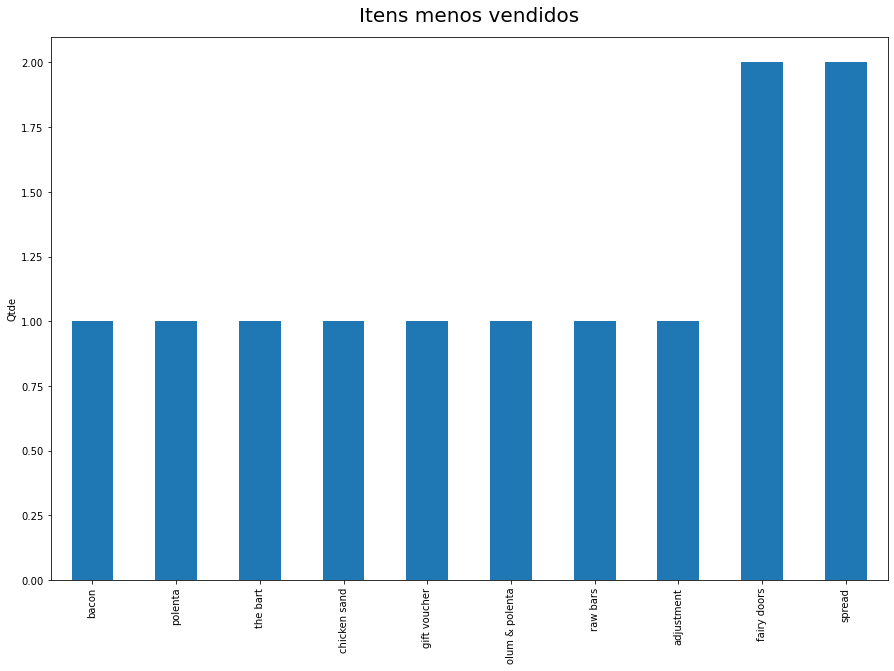

In [24]:
# Itens menos vendidos

ax = qtde_itens.nsmallest(10).plot(kind="bar")
ax.set_title("Itens menos vendidos", size=20, weight=500, pad=15)
ax.set_ylabel("Qtde")
plt.show()

In [25]:
# Conta itens não nulos em cada objeto

qtde_por_cesta = transacoes.notna().apply(sum, axis=1)

In [26]:
# Separar objetos com mais de um item na transação

cestas = [set(linha.dropna()) for _, linha in transacoes[qtde_por_cesta > 1].iterrows()]
cestas [:5]

[{'cookies', 'hot chocolate', 'jam'},
 {'bread', 'coffee', 'pastry'},
 {'medialuna', 'muffin', 'pastry'},
 {'coffee', 'medialuna', 'pastry', 'tea'},
 {'bread', 'pastry'}]

In [27]:
len(cestas)

5517

In [29]:
# Rodar o Apriori

minsup = 0.04
minconf = 0.4
regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print(
        f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
        f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
    )
    

[] --> [coffee]  Suporte: 0.604  Confiança: 0.604
['bread'] --> [coffee]  Suporte: 0.154  Confiança: 0.447
['coffee'] --> [cake]  Suporte: 0.094  Confiança: 0.586
['cookies'] --> [coffee]  Suporte: 0.048  Confiança: 0.568
['hot chocolate'] --> [coffee]  Suporte: 0.051  Confiança: 0.580
['medialuna'] --> [coffee]  Suporte: 0.060  Confiança: 0.631
['pastry'] --> [coffee]  Suporte: 0.082  Confiança: 0.600
['sandwich'] --> [coffee]  Suporte: 0.066  Confiança: 0.591
['tea'] --> [coffee]  Suporte: 0.086  Confiança: 0.412
['toast'] --> [coffee]  Suporte: 0.041  Confiança: 0.737
